Codigo de Euler de segundo orden, dado por el profesor.

In [ ]:

import numpy as np

def euler_ec_orden_2(t0,tf,x0,v0,f,N):
    '''
    Resuelve
        x''(t) = f(t,x,x')
          x(0) = x0
         x'(0) = v0
    en [t0,tf] usando Euler con N pasos. #

    Devuelve tupla (h, tt, xx, vv) con
         h: paso
        tt: array con grilla de tiempos
        xx: array con aproximación de x sobre la grilla    
        vv: array con aproximación de x' sobre la grilla
    '''

    h = (tf-t0)/N
    tt = np.linspace(t0,tf,N+1)
    xx = np.zeros(N+1)
    vv = np.zeros(N+1)

    xx[0], vv[0] = x0, v0
    
    for i in range(N):
        vv[i+1] = vv[i] + h*f(tt[i],xx[i],vv[i])
        xx[i+1] = xx[i] + h*vv[i]

    return h,tt,xx,vv


Ejemplo

Nota: *Remember simba* cuando no estés en colab

```
# from euler_segundo_orden import euler_ec_orden_2
```



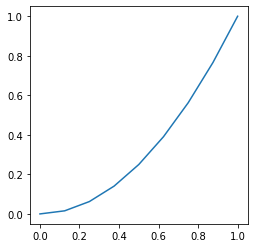

In [ ]:

import numpy as np

def euler_ec_orden_2(t0,tf,x0,v0,f,N):
    h = (tf-t0)/N
    tt = np.linspace(t0,tf,N+1)
    xx = np.zeros(N+1)
    vv = np.zeros(N+1)

    xx[0], vv[0] = x0, v0
    
    for i in range(N):
        vv[i+1] = vv[i] + h*f(tt[i],xx[i],vv[i])
        xx[i+1] = xx[i] + h*vv[i]

    return h,tt,xx,vv

import matplotlib.pyplot as plt

def metodo_disparo(a, b, ya, yb, f, N):
  """Resuelve
        y''(t) = f(t,y,y')
          y(a) = ya
          y(b) = yb
    en [a.b] usando metodo de disparo con Euler con N pasos. #
  """
  
  #Hacemos Euler en [a.b]
  #con dos velocidades iniciales distintas

  #Aproxima solución y0(t) con yo'(a)= 0
  h,tt,yy0,_ = euler_ec_orden_2(a, b, ya, 0, f, N) 
                                     
  #Aproxima solución y1(t) con y1'(a)= 1
  _,_,yy1,_ = euler_ec_orden_2(a, b, ya, 1, f, N)

  #plt.plot(tt, yy0, tt, yy1)

  #Misma escala en ambos jes
  #plt.gca().set_aspect('equal')
  #plt.show()
  #ll es el lambda
  ll = (yb - yy0[-1]) / (yy1[-1] - yy0[-1])

  #La solución es la combinación lineal
  #y = (1 - ll)*y0 + ll*y1
  yy = (1 - ll)*yy0 + ll*yy1

  return h, tt, yy


#Datos para hallar y(t) = t² en [0,1]
a, b = 0, 1
ya, yb = 0, 1

#Armamos f para tener ecuación y''= 2
def f(t,y,v):
  return 2

h, tt, yy = metodo_disparo(a, b, ya, yb, f, 8)

plt.plot(tt, yy)
plt.gca().set_aspect('equal')
plt.show()



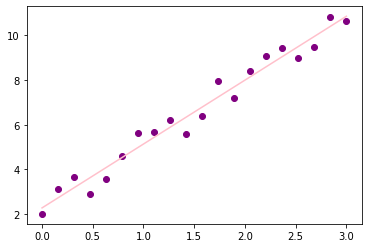

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 

N = 20

xx = np.linspace(0, 3, N)
yy = 3*xx + 2
yy = yy + (2*np.random.random(N) - 1)

#polyfit <3

#plotea nube de puntos
plt.scatter(xx, yy, color='purple')

#busco recta y = ax + b que aproxime la tendencia de los xx, yy
m, b = np.polyfit(xx, yy, 1)

#plotea recta y = mx + b
plt.plot(xx, m*xx + b, color='pink')

#plt.gca().set_aspect('equal')
plt.show()
